#**Trabalho 3 - Inteligência Artificial**

Fazendo download das informações necessárias:

In [ ]:
!git clone https://github.com/natalia-rios/IA.git

Cloning into 'IA'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
cd IA

/content/IA


In [ ]:
pip install scikit-plot

Importando as bibliotecas necessárias:

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score
from scikitplot.metrics import plot_confusion_matrix

Classe para regressão logística:

In [ ]:
class LogisticRegression() : 
    def __init__( self, learning_rate, iterations ) :         
        self.learning_rate = learning_rate         
        self.iterations = iterations 

    # Função para treinamento do modelo      
    def fit( self, X, Y ) :         
        # número de exemplos de treino, número de features     
        self.m, self.n = X.shape    
        # inicialização dos pesos     
        self.W = np.zeros( self.n )         
        self.b = 0        
        self.X = X         
        self.Y = Y 

        # Aprendizado com gradient descent             
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
            
    # Função para atualizar os pesos no gradient descent 
    def update_weights( self ) :            
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) 
          
        tmp = ( A - self.Y.T )         
        tmp = np.reshape( tmp, self.m )         
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m  
          
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self

    # Função para realizar a predição      
    def predict( self, X ) :     
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )         
        Y = np.where( Z > 0.5, 1, 0 )         
        return Y 

Importando o dataset:

In [ ]:
data = pd.read_csv("/content/IA/wdbc.data", header = None)

In [ ]:
data.head

<bound method NDFrame.head of            0  1      2      3   ...      28      29      30       31
0      842302  M  17.99  10.38  ...  0.7119  0.2654  0.4601  0.11890
1      842517  M  20.57  17.77  ...  0.2416  0.1860  0.2750  0.08902
2    84300903  M  19.69  21.25  ...  0.4504  0.2430  0.3613  0.08758
3    84348301  M  11.42  20.38  ...  0.6869  0.2575  0.6638  0.17300
4    84358402  M  20.29  14.34  ...  0.4000  0.1625  0.2364  0.07678
..        ... ..    ...    ...  ...     ...     ...     ...      ...
564    926424  M  21.56  22.39  ...  0.4107  0.2216  0.2060  0.07115
565    926682  M  20.13  28.25  ...  0.3215  0.1628  0.2572  0.06637
566    926954  M  16.60  28.08  ...  0.3403  0.1418  0.2218  0.07820
567    927241  M  20.60  29.33  ...  0.9387  0.2650  0.4087  0.12400
568     92751  B   7.76  24.54  ...  0.0000  0.0000  0.2871  0.07039

[569 rows x 32 columns]>

In [ ]:
data[1].replace({'M': 1, 'B': 0}, inplace=True)
data.drop(columns=[0], inplace=True)

In [ ]:
data.head

<bound method NDFrame.head of      1      2      3       4       5   ...       27      28      29      30       31
0     1  17.99  10.38  122.80  1001.0  ...  0.66560  0.7119  0.2654  0.4601  0.11890
1     1  20.57  17.77  132.90  1326.0  ...  0.18660  0.2416  0.1860  0.2750  0.08902
2     1  19.69  21.25  130.00  1203.0  ...  0.42450  0.4504  0.2430  0.3613  0.08758
3     1  11.42  20.38   77.58   386.1  ...  0.86630  0.6869  0.2575  0.6638  0.17300
4     1  20.29  14.34  135.10  1297.0  ...  0.20500  0.4000  0.1625  0.2364  0.07678
..   ..    ...    ...     ...     ...  ...      ...     ...     ...     ...      ...
564   1  21.56  22.39  142.00  1479.0  ...  0.21130  0.4107  0.2216  0.2060  0.07115
565   1  20.13  28.25  131.20  1261.0  ...  0.19220  0.3215  0.1628  0.2572  0.06637
566   1  16.60  28.08  108.30   858.1  ...  0.30940  0.3403  0.1418  0.2218  0.07820
567   1  20.60  29.33  140.10  1265.0  ...  0.86810  0.9387  0.2650  0.4087  0.12400
568   0   7.76  24.54   47.92   181

In [ ]:
X = data.drop(columns=[1])

In [ ]:
Y = data[1]

Separando os conjuntos de treino e teste:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42) 

In [ ]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

Inicializando e treinando o modelo:

In [ ]:
model = LogisticRegression(learning_rate = 0.1, iterations = 1000)

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


Predição no conjunto de teste:

In [ ]:
y_pred = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


Tabela para auxiliar a explicação das métricas:

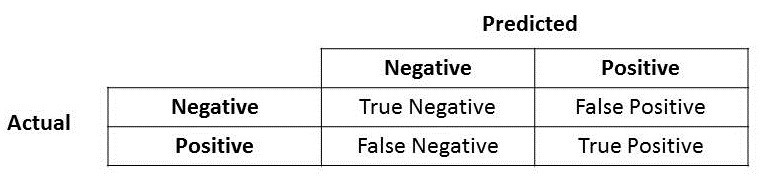

###**Acurácia**

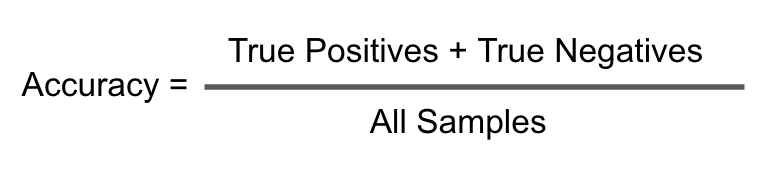

In [ ]:
accuracy_score(y_test, y_pred)

0.9532163742690059


###**Precisão**


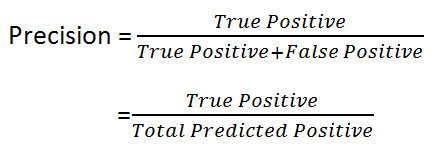

In [ ]:
precision_score(y_test, y_pred)

0.9508196721311475

###**Matriz de confusão**
É uma tabela que permite a visualização do desempenho de um algoritmo de classificação. Possui duas linhas e duas colunas que relata o número de falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

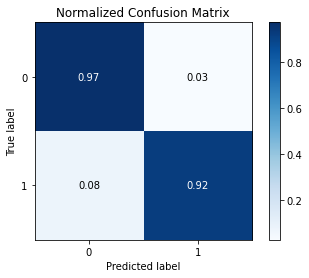

In [ ]:
plot_confusion_matrix(y_test, y_pred, normalize='true')